# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
#Define the URL
url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

target_url=url+"appid="+api_key+"&units="+units+"&q="


weather_json=requests.get(target_url+cities[0]).json()

#Pretty print the JSON
print(json.dumps(weather_json,indent=4,sort_keys=True))

{
    "base": "model",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 15.34,
        "lon": 74.49
    },
    "dt": 1571766321,
    "id": 1273574,
    "main": {
        "grnd_level": 934,
        "humidity": 98,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 68.49,
        "temp_max": 68.49,
        "temp_min": 68.49
    },
    "name": "Vaini",
    "sys": {
        "country": "IN",
        "sunrise": 1571705701,
        "sunset": 1571747872
    },
    "timezone": 19800,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 221,
        "speed": 3.15
    }
}


In [4]:
#Retrieving elements
city_name=[]
country=[]
date=[]
latitude=[]
longitude=[]
temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]

#Define counter for printing the record number and set number
record_counter=0
set_counter=1

print("Beginning Data Retrieval\n")
print("---------------------------------------------------------------\n")

for c in cities:
    try:
        
        city_response=requests.get(target_url+c).json()
        city_name.append(city_response["name"])
        country.append(city_response["sys"]["country"])
        date.append(city_response["dt"])
        latitude.append(city_response["coord"]["lat"])
        longitude.append(city_response["coord"]["lon"])
        temperature.append(city_response["main"]["temp_max"])
        humidity.append(city_response["main"]["humidity"])
        cloudiness.append(city_response["clouds"]["all"])
        wind_speed.append(city_response["wind"]["speed"])
        print(f"Processing Record {record_counter} of Set {set_counter} | {c}")
        record_counter=record_counter+1
        print(f"{target_url+c}")
        if(record_counter==50):
            record_counter=0
            set_counter=set_counter+1
    except:
        print(f"City '{c}' not found. Skipping...")

print("---------------------------------------------------------------\n")        
print("Data Retrieval Complete\n")
print("---------------------------------------------------------------")

Beginning Data Retrieval

---------------------------------------------------------------

Processing Record 0 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=vaini
Processing Record 1 of Set 1 | biak
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=biak
Processing Record 2 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=kapaa
Processing Record 3 of Set 1 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=lorengau
City 'asau' not found. Skipping...
Processing Record 4 of Set 1 | verkhoyansk
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=verkhoyansk
Processing Record 5 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e826910

City 'nizhneyansk' not found. Skipping...
Processing Record 2 of Set 2 | rosignol
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=rosignol
Processing Record 3 of Set 2 | beoumi
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=beoumi
Processing Record 4 of Set 2 | east london
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=east london
Processing Record 5 of Set 2 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=tuktoyaktuk
Processing Record 6 of Set 2 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=hofn
Processing Record 7 of Set 2 | whitehorse
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=whitehorse
Processing Record 8 of Set 2 | requena
htt

Processing Record 5 of Set 3 | gazli
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=gazli
Processing Record 6 of Set 3 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=chokurdakh
City 'korla' not found. Skipping...
City 'toliary' not found. Skipping...
Processing Record 7 of Set 3 | port hedland
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=port hedland
Processing Record 8 of Set 3 | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=san patricio
Processing Record 9 of Set 3 | yumen
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=yumen
Processing Record 10 of Set 3 | broome
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=broome
Processin

Processing Record 7 of Set 4 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=qaanaaq
Processing Record 8 of Set 4 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=pevek
Processing Record 9 of Set 4 | beloha
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=beloha
Processing Record 10 of Set 4 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=ilulissat
Processing Record 11 of Set 4 | esmeralda
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=esmeralda
Processing Record 12 of Set 4 | bani walid
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=bani walid
Processing Record 13 of Set 4 | zelenets
http://api.openweathermap.org/data/2.5/weather?a

Processing Record 10 of Set 5 | dzerzhinskoye
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=dzerzhinskoye
Processing Record 11 of Set 5 | kortkeros
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=kortkeros
Processing Record 12 of Set 5 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=port hardy
City 'bargal' not found. Skipping...
Processing Record 13 of Set 5 | palmer
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=palmer
Processing Record 14 of Set 5 | bulawayo
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=bulawayo
Processing Record 15 of Set 5 | acs
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=acs
Processing Record 16 of Set 5 | ancud
http:

Processing Record 11 of Set 6 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=kudahuvadhoo
Processing Record 12 of Set 6 | kaya
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=kaya
Processing Record 13 of Set 6 | berezniki
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=berezniki
Processing Record 14 of Set 6 | wrexham
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=wrexham
Processing Record 15 of Set 6 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=ribeira grande
City 'asilah' not found. Skipping...
Processing Record 16 of Set 6 | poum
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=poum
Processing Record 17 of Set 6 | vrangel
h

Processing Record 13 of Set 7 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=luderitz
Processing Record 14 of Set 7 | puerto baquerizo moreno
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=puerto baquerizo moreno
Processing Record 15 of Set 7 | liuhe
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=liuhe
Processing Record 16 of Set 7 | rocha
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=rocha
Processing Record 17 of Set 7 | port blair
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=port blair
Processing Record 18 of Set 7 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=beringovskiy
Processing Record 19 of Set 7 | sept-iles
http://api

Processing Record 17 of Set 8 | marana
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=marana
Processing Record 18 of Set 8 | auki
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=auki
Processing Record 19 of Set 8 | tautira
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=tautira
Processing Record 20 of Set 8 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=sinnamary
Processing Record 21 of Set 8 | provost
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=provost
Processing Record 22 of Set 8 | mackay
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=mackay
Processing Record 23 of Set 8 | pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?appid=8

Processing Record 20 of Set 9 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=isangel
Processing Record 21 of Set 9 | sattahip
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=sattahip
Processing Record 22 of Set 9 | pitimbu
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=pitimbu
Processing Record 23 of Set 9 | lerwick
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=lerwick
City 'bousso' not found. Skipping...
Processing Record 24 of Set 9 | bac ninh
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=bac ninh
Processing Record 25 of Set 9 | primorsk
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=primorsk
Processing Record 26 of Set 9 | petropavlovsk-kamch

Processing Record 22 of Set 10 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=guerrero negro
Processing Record 23 of Set 10 | kadnikov
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=kadnikov
Processing Record 24 of Set 10 | saskatoon
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=saskatoon
Processing Record 25 of Set 10 | lopsmarka
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=lopsmarka
City 'urumqi' not found. Skipping...
Processing Record 26 of Set 10 | port keats
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=port keats
City 'asayita' not found. Skipping...
Processing Record 27 of Set 10 | nojorid
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=im

Processing Record 23 of Set 11 | bosaso
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=bosaso
Processing Record 24 of Set 11 | takoradi
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=takoradi
City 'one hundred mile house' not found. Skipping...
Processing Record 25 of Set 11 | larreynaga
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=larreynaga
Processing Record 26 of Set 11 | neuss
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=neuss
Processing Record 27 of Set 11 | clocolan
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=clocolan
Processing Record 28 of Set 11 | flagstaff
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=flagstaff
Processing Record 29 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Convert the data to DataFrame
city_weather_df=pd.DataFrame({"City":city_name,
                              "Country":country,
                              "Date":date,
                             "Latitude":latitude,
                             "Longitude":longitude,
                             "Temperature":temperature,
                             "Humidity":humidity,
                             "Cloudiness":cloudiness,
                             "Wind_speed":wind_speed})

#Convert date from unix format
city_weather_df["Date"]=pd.to_datetime(city_weather_df["Date"],unit='s')

#Display the DataFrame
city_weather_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_speed
0,Vaini,IN,2019-10-22 17:45:21,15.34,74.49,68.49,98,98,3.15
1,Biak,ID,2019-10-22 17:45:21,-0.91,122.88,80.22,75,19,14.56
2,Kapaa,US,2019-10-22 17:45:21,22.08,-159.32,78.80,83,40,14.99
3,Lorengau,PG,2019-10-22 17:45:22,-2.02,147.27,83.86,73,95,7.63
4,Verkhoyansk,RU,2019-10-22 17:45:22,67.55,133.39,1.90,86,82,0.78


In [6]:
#Verify counts
city_weather_df.count()

City           533
Country        533
Date           533
Latitude       533
Longitude      533
Temperature    533
Humidity       533
Cloudiness     533
Wind_speed     533
dtype: int64

In [7]:
#Retrieve the current date for plotting the graphs
current_date_list=(city_weather_df["Date"].dt.strftime('%m/%d/%y')).unique()
current_date=current_date_list[0]
current_date

'10/22/19'

In [8]:
#Export the city data into a .csv.
city_weather_df.to_csv("../city_weather.csv",index=False,header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

//anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


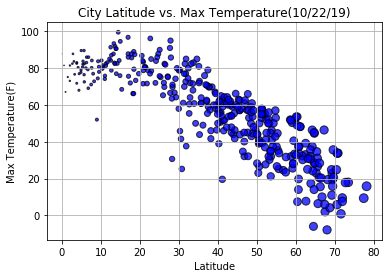

In [9]:
# Plot Latitude vs.Temperature (Scatter Plot)
plt.scatter(city_weather_df["Latitude"],city_weather_df["Temperature"],marker="o",facecolors="blue",edgecolors="black",s=latitude,alpha=0.75)

# Set the labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

#Set the title
plt.title(f"City Latitude vs. Max Temperature({current_date})")

#Set the grids
plt.grid()

#Save the plot
plt.savefig("../Latitude_vs_Temperature.png")

#Show the plot
plt.show()

#### Latitude vs. Humidity Plot

In [10]:
# Plot Latitude vs. Humidity

#### Latitude vs. Cloudiness Plot

In [11]:
# Plot Latitude vs. Cloudiness

#### Latitude vs. Wind Speed Plot

In [12]:
# Plot Latitude vs. Wind Speed